In [1]:
import numpy as np
import verde as vd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
data = np.load("cassified_field_results.npz")
classified_eastings = data["arr_0"]
classified_northings = data["arr_1"]
classified_probs_stack = data["arr_2"]

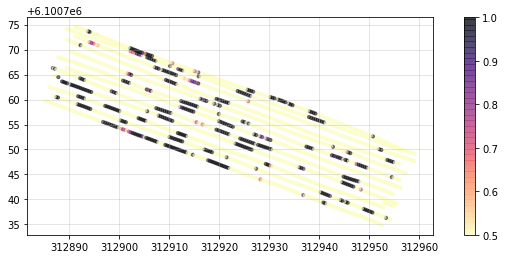

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(11, 4))

plt.colorbar(ax.scatter(
    classified_eastings, classified_northings, c=(classified_probs_stack[:, 1]), marker='o', 
    cmap="magma_r", vmin=0.5, vmax=1, s=10, alpha=0.5
    ), 
    ax=ax
)

ax.set_aspect(1)
ax.grid(which="both", alpha=0.4)

In [18]:
vd.Spline?

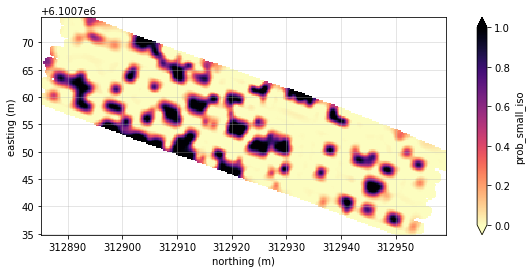

In [23]:
coordinates = (classified_eastings, classified_northings)
spacing = 0.25

fig, ax = plt.subplots(1, 1, figsize=(11, 4))

chain = vd.Chain([
    ("mean", vd.BlockMean(spacing=spacing)),
    ("spline", vd.Spline(damping=1e-7)),
])
# print(chain)

chain.fit(coordinates, classified_probs_stack[:, 1])

region = vd.get_region(coordinates)

grid = chain.grid(
    region=region,
    spacing=spacing, 
    dims=["easting (m)", "northing (m)"],
    data_names=["prob_small_iso"]
)
mask = vd.distance_mask(
    coordinates,
    maxdist=1,
    grid=grid
)

# cm = plt.get_cmap('magma_r')
# c_norm = Normalize(vmin=0., vmax=1.)
# scalar_map = cmap.ScalarMappable(norm=c_norm, cmap=cm)
# scalar_map.set_array([])

pc = mask.prob_small_iso.plot.pcolormesh(ax=ax, vmin=0, vmax=1, cmap="magma_r") #, cmap=cm)

ax.set_aspect(1)
ax.grid(which="both", alpha=0.4)